In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from invert import invert_ebb
from simulate import run_sinusoidal_simulation
from laminar import model_comparison


In [6]:
sim_vertex=420
freq=20
dipole_moment=10
sim_patch_size=5
SNR=-5
n_layers=11
layers = np.linspace(1, 0, n_layers)

data_dir='./test_data'
out_dir='./test_output'
subj_id='sub-104'
ses_id='ses-01'
# Subject fiducial coil coordinates
nas=[0.9662503311032098, 108.83514306876269, 1.6712361927090313]
lpa=[-74.28671169006893, 20.15061014698176, -29.849056272705948]
rpa=[76.02110531729883, 18.9467849625573, -25.779407159603114]

# T1
mri_fname = os.path.join(data_dir,'spm', subj_id, 's2023-02-28_13-33-133958-00001-00224-1.nii')

mesh_fname = os.path.join(out_dir, subj_id, 'multilayer.11.ds.link_vector.gii')

## Create intermediate surfaces if needed
layer_fnames = []
for l, layer in enumerate(layers):
    if layer == 1:
        layer_fnames.append(os.path.join(out_dir, subj_id, 'pial.ds.link_vector.gii'))
    elif layer > 0 and layer < 1:
        layer_name = '{:.3f}'.format(layer)
        layer_fnames.append(os.path.join(out_dir, subj_id, f'{layer_name}.ds.link_vector.gii'))        
    elif layer == 0:
        layer_fnames.append(os.path.join(out_dir, subj_id, 'white.ds.link_vector.gii'))

# Data file to base simulations on
data_file=os.path.join(data_dir, 'processed', subj_id, ses_id, 'spm/spm-converted_autoreject-sub-104-ses-01-001-btn_trial-epo.mat')

patch_size=5
n_temp_modes = 4

mesh=nib.load(mesh_fname)
verts_per_surf=mesh.darrays[0].data.shape[0]/n_layers


In [13]:
# Invert the subject's data. This step only has to be done once
[coreg_fname,F]=invert_ebb(subj_id, out_dir, nas, lpa, rpa, mri_fname, mesh_fname, data_file, n_layers, 
                              patch_size=patch_size, n_temp_modes=n_temp_modes)

Smoothing ./test_output/sub-104/multilayer.11.ds.link_vector.gii
FWHM of 5.00 is approx 3.33 times vertex spacing


EngineError: MATLAB function cannot be evaluated

In [7]:
coreg_fname='./test_output/sub-104/inv/multilayer.11.ds.link_vector.spm-converted_autoreject-sub-104-ses-01-001-btn_trial-epo.mat'

In [ ]:
# Simulate on pial surface
pial_vertex=sim_vertex
sim_fname=run_sinusoidal_simulation(coreg_fname, mri_fname, mesh_fname, nas, lpa, rpa, pial_vertex, 
                                    freq, dipole_moment, sim_patch_size, SNR)    
[pialF,whiteF]=model_comparison(subj_id, out_dir, nas, lpa, rpa, mri_fname, [layer_fnames[0], layer_fnames[-1]], 
                                sim_fname, patch_size=sim_patch_size, n_temp_modes=n_temp_modes)
pialF-whiteF

In [10]:
sim_fname

'sim_mesh.420.multilayer.11.ds.link_vector.mat'

In [ ]:
# Simulate on white matter surface
white_vertex=(n_layers-1)*verts_per_surf+sim_vertex
sim_fname=run_sinusoidal_simulation(coreg_fname, mri_fname, mesh_fname, nas, lpa, rpa, white_vertex, 
                                    freq, dipole_moment, sim_patch_size, SNR) 
[pialF,whiteF]=model_comparison(subj_id, out_dir, nas, lpa, rpa, mri_fname, [layer_fnames[0], layer_fnames[-1]], 
                                sim_fname, patch_size=sim_patch_size, n_temp_modes=n_temp_modes)
pialF-whiteF

In [9]:
layerF=model_comparison(subj_id, out_dir, nas, lpa, rpa, mri_fname, layer_fnames,
                        sim_fname, patch_size=sim_patch_size, n_temp_modes=n_temp_modes)

Smoothing ./test_output/sub-104/pial.ds.link_vector.gii
FWHM of 5.00 is approx 3.11 times vertex spacing
Smoothing ./test_output/sub-104/0.900.ds.link_vector.gii
FWHM of 5.00 is approx 3.15 times vertex spacing
Smoothing ./test_output/sub-104/0.800.ds.link_vector.gii
FWHM of 5.00 is approx 3.20 times vertex spacing
Smoothing ./test_output/sub-104/0.700.ds.link_vector.gii
FWHM of 5.00 is approx 3.24 times vertex spacing
Smoothing ./test_output/sub-104/0.600.ds.link_vector.gii
FWHM of 5.00 is approx 3.29 times vertex spacing
Smoothing ./test_output/sub-104/0.500.ds.link_vector.gii
FWHM of 5.00 is approx 3.33 times vertex spacing
Smoothing ./test_output/sub-104/0.400.ds.link_vector.gii
FWHM of 5.00 is approx 3.38 times vertex spacing
Smoothing ./test_output/sub-104/0.300.ds.link_vector.gii
FWHM of 5.00 is approx 3.43 times vertex spacing
Smoothing ./test_output/sub-104/0.200.ds.link_vector.gii
FWHM of 5.00 is approx 3.48 times vertex spacing
Smoothing ./test_output/sub-104/0.100.ds.link_v

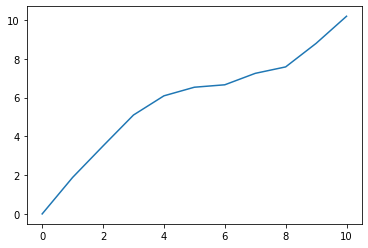

In [10]:
layerF=np.array(layerF)
plt.plot(layerF-np.min(layerF))

In [ ]:
all_layerF=[]
for l, layer in enumerate(layers):
    l_vertex=l*verts_per_surf+sim_vertex
    sim_fname=run_sinusoidal_simulation(coreg_fname, mri_fname, mesh_fname, nas, lpa, rpa, l_vertex, 
                                        invfoi, dipole_moment, sim_patch_size, SNR) 
    layerF=model_comparison(subj_id, out_dir, nas, lpa, rpa, mri_fname, layer_fnames,
                            sim_fname, patch_size=sim_patch_size, n_temp_modes=n_temp_modes)
    all_layerF.append(layerF)
all_layerF=np.array(all_layerF)

Smoothing ./test_output/sub-104/pial.ds.link_vector.gii
FWHM of 5.00 is approx 3.11 times vertex spacing
Smoothing ./test_output/sub-104/0.900.ds.link_vector.gii
FWHM of 5.00 is approx 3.15 times vertex spacing
Smoothing ./test_output/sub-104/0.800.ds.link_vector.gii
FWHM of 5.00 is approx 3.20 times vertex spacing
Smoothing ./test_output/sub-104/0.700.ds.link_vector.gii
FWHM of 5.00 is approx 3.24 times vertex spacing
Smoothing ./test_output/sub-104/0.600.ds.link_vector.gii
FWHM of 5.00 is approx 3.29 times vertex spacing
Smoothing ./test_output/sub-104/0.500.ds.link_vector.gii
FWHM of 5.00 is approx 3.33 times vertex spacing
Smoothing ./test_output/sub-104/0.400.ds.link_vector.gii
FWHM of 5.00 is approx 3.38 times vertex spacing
Smoothing ./test_output/sub-104/0.300.ds.link_vector.gii
FWHM of 5.00 is approx 3.43 times vertex spacing
Smoothing ./test_output/sub-104/0.200.ds.link_vector.gii
FWHM of 5.00 is approx 3.48 times vertex spacing
Smoothing ./test_output/sub-104/0.100.ds.link_v

In [ ]:
plt.figure()
for l in range(n_layers):
    layerF=all_layerF[l,:]
    plt.plot(layerF-np.min(layerF), label=f'{l}')
plt.legend()